In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anvit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anvit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anvit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_csv('resume.csv')

In [3]:
df.head()

,ID,Job Title,Skills
0,1,Software Engineer,"Python, Java, SQL, C++, Git, REST APIs, Docker..."
1,2,Project Manager,"Project Management, CAD, MATLAB, Agile, Scrum,..."
2,3,Electrical Engineer,"Circuit Design, Python, Simulink, PLC, PCB Des..."
3,4,Data Analyst,"Python, SQL, Tableau, R, Excel, Data Visualiza..."
4,5,Structural Engineer,"AutoCAD, Revit, Project Management, Structural..."


In [4]:
df.shape

(700, 3)

In [5]:
df['Job Title'].value_counts()

Job Title
Blockchain Developer              5
Social Media Manager              4
Scrum Master                      4
Data Engineer                     4
Front-End Developer               4
                                 ..
Front-End React Developer         1
Cloud Support Specialist          1
Chief Technology Officer (CTO)    1
Game Programmer                   1
Key Account Manager               1
Name: count, Length: 522, dtype: int64

In [6]:
duplicates = df['Job Title'].duplicated(keep=False)
df_unique = df[~duplicates]
df_unique.to_csv('cleaned_file.csv', index=False)

print(df_unique)

      ID                Job Title  \
1      2          Project Manager   
2      3      Electrical Engineer   
4      5      Structural Engineer   
8      9    Cybersecurity Analyst   
9     10     Marketing Specialist   
..   ...                      ...   
678  679               Copywriter   
679  680          Content Creator   
686  687  Fundraising Coordinator   
688  689        Account Executive   
693  694      Key Account Manager   

                                                Skills  
1    Project Management, CAD, MATLAB, Agile, Scrum,...  
2    Circuit Design, Python, Simulink, PLC, PCB Des...  
4    AutoCAD, Revit, Project Management, Structural...  
8    Network Security, Firewalls, IDS, IPS, Threat ...  
9    SEO, Content Creation, Google Analytics, SEM, ...  
..                                                 ...  
678  Copywriting, SEO, Creative Writing, Content St...  
679  Social Media, Content Strategy, Copywriting, P...  
686  Fundraising, Nonprofit Organizations,

In [7]:
top_n = 20  
top_jobs = df['Job Title'].value_counts().nlargest(top_n).index
filtered_df = df[df['Job Title'].isin(top_jobs)]

In [8]:
df['Job Title'].unique()

array(['Software Engineer', 'Project Manager', 'Electrical Engineer',
       'Data Analyst', 'Structural Engineer', 'Web Developer',
       'Machine Learning Engineer', 'Database Administrator',
       'Cybersecurity Analyst', 'Marketing Specialist',
       'Mobile App Developer', 'Cloud Solutions Architect',
       'Financial Analyst', 'UX/UI Designer', 'DevOps Engineer',
       'Business Analyst', 'Human Resources Specialist',
       'Mechanical Engineer', 'Quality Assurance Engineer',
       'Content Writer', 'Network Engineer', 'Sales Manager',
       'Graphic Designer', 'IT Support Specialist', 'Front-End Developer',
       'Data Scientist', 'Product Manager', 'Systems Analyst',
       'Biomedical Engineer', 'Supply Chain Analyst',
       'Environmental Scientist', 'E-commerce Specialist',
       'Artificial Intelligence Engineer', 'Game Developer',
       'Operations Manager', 'Social Media Manager', 'Research Scientist',
       'Financial Planner', 'Robotics Engineer',
       'H

In [9]:
def clean_text(txt):
    clean_text = re.sub('http\S+\s', ' ', txt)
    clean_text = re.sub('RT|cc', ' ', clean_text)
    clean_text = re.sub('#\S+\s', ' ', clean_text)
    clean_text = re.sub('@\S+', '  ', clean_text)
    clean_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', clean_text)
    clean_text = re.sub(r'[^\x00-\x7f]', ' ', clean_text)
    clean_text = re.sub('\s+', ' ', clean_text)
    tokens = nltk.word_tokenize(clean_text.lower())
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word.isalpha()]
    return ' '.join(tokens)


In [10]:
df['cleaned_job_title'] = df['Job Title'].apply(clean_text)
df['cleaned_skills'] = df['Skills'].apply(clean_text)


In [11]:
def clean_resume(txt):
    return clean_text(txt)


In [12]:
resume_text = """Anvitha G Rao
+91-9480199605/+91-7892821940
anvitha8181@gmail.com
Linkedin : http://www.linkedin.com/in/anvitha-g-rao-ab529324b Github : https://github.com/anvitha-rao10
Sripada, Hari Om Nivas, Urwa, Mangalore-575006
SUMMARY
A Computer Science and Engineering student specializing in IoT, Cyber Security, Blockchain Technology, AIML, and Full Stack Development, passionate about developing interconnected systems that leverage the power of IoT to enhance efficiency and foster innovation. I am eager to contribute my knowledge and enthusiasm to a progressive team during my internship.
EDUCATION
B.E - CSE (IOT & Cyber Security with Block Chain Technology)
Mangalore Institute of Technology & Engineering
2021-Present
CGPA:9.1
Senior Secondary (12th) – Boscoss PU College, Mangalore
2019-2021
Percentage:90%
Secondary School (SSLC) – Canara High School, Mangalore
2018-2019
Percentage:85%
SKILLS
Languages
: Java, C language, Python, HTML, CSS
Database
: SQL
Tools
: MySQL, Visual Studio Code, Postman, IntelliJ, Arduino IDE, Spring Boot
Soft Skills
: Communication, Teamwork, Work ethics, Problem-solving, Time Management, Emotional Intelligence.
INTERNSHIP
Glowtouch Technologies | FrontendDeveloper October-2023 to November-2023 Technologies: Angular Js, NodeJs, MySQL, Postman, Spring Boot
Worked on a Project - ‘Ecommerce Platform’, gained experience in Back-end Development using Angular Js, Node Js, MySQL, Postman. Also, learnt about how Ecommerce works.
PROJECTS
• IoT Based smart fire detection and alert system | Group of 3 November-2022 Technologies: Arduino UNO, Sensors, Actuators.
The aim of this project is to enhance safety and minimize damage by providing early detection and immediate alerts of fire incidents.
• Crop Disease Detection System | Group of 4 May-2024 Technologies: TensorFlow Framework, Keras Framework, Streamlit.
The aim of this project is to use machine learning to accurately identify crop diseases early, enhancing agricultural productivity and reducing crop losses.
COURSES & WORKSHOPS
• Introduction To Industry 4.0 And Industrial Internet of Things - Certified by IIT Kharagpur
• Database Management System -Certified by IIT Kharagpur
• TalentNext Course on Java Full Stack -Certified by Wipro
• Blockchain and Dapps Development for cybersecurity - Mangalore Institute of Technology and Engineering
• Innovation & Inventions on Autonomous Vehicle - Mangalore Institute of Technology and Engineering
• Cybersecurity - Google and SmartKnower
• Academic Automation Explorer Training - Ui Path
• Cyber Defense Engineering using Python – Certified by Cybervidyapeeth Foundation
• Introduction to Information Security - Great Learning
• MATLAB Onramp – Matworks | Training Service
• Cybersecurity and Ethical Hacking – Reinfosec, Bangalore
TECHNICAL ACTIVITIES
• Participated in Codify and secured 2nd place.
• Served as Secretary of CYBOTIC
EXTRA CURRICULAR & HOBBIES
• Reading novels, Dance and Music, Needlecraft."""
cleaned_resume = clean_resume(resume_text)

In [13]:
df['job_description'] = df['cleaned_job_title'] + ' ' + df['cleaned_skills']

In [14]:
vectorizer = TfidfVectorizer(max_features=5000)
job_vectors = vectorizer.fit_transform(df['job_description']).toarray()

In [15]:
knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(job_vectors)

NearestNeighbors(metric='cosine')

In [16]:
resume_vector = vectorizer.transform([cleaned_resume]).toarray()
distances, indices = knn.kneighbors(resume_vector)

In [17]:
top_5_jobs = df.iloc[indices[0]]

print("\nTop 5 Matching Job Titles:")
for i, row in top_5_jobs.iterrows():
    print(f"- {row['Job Title']} (Matched Skills: {row['Skills']})")


Top 5 Matching Job Titles:
- Chief Technology Officer (CTO) (Matched Skills: IT Strategy, Technology Leadership, Cloud, Software Development, Team Management)
- Director of Engineering (Matched Skills: Engineering Management, Project Oversight, System Design, Architecture, Leadership)
- IoT Solutions Engineer (Matched Skills: IoT, Embedded Systems, Python, Hardware Design, Cloud Computing, Networking)
- Technology Integration Manager (Matched Skills: Integration Strategy, Systems Integration, Project Management, APIs, Cloud Computing)
- Research and Development Engineer (Matched Skills: R&D, Innovation, Product Design, Prototyping, CAD, Engineering, MATLAB)


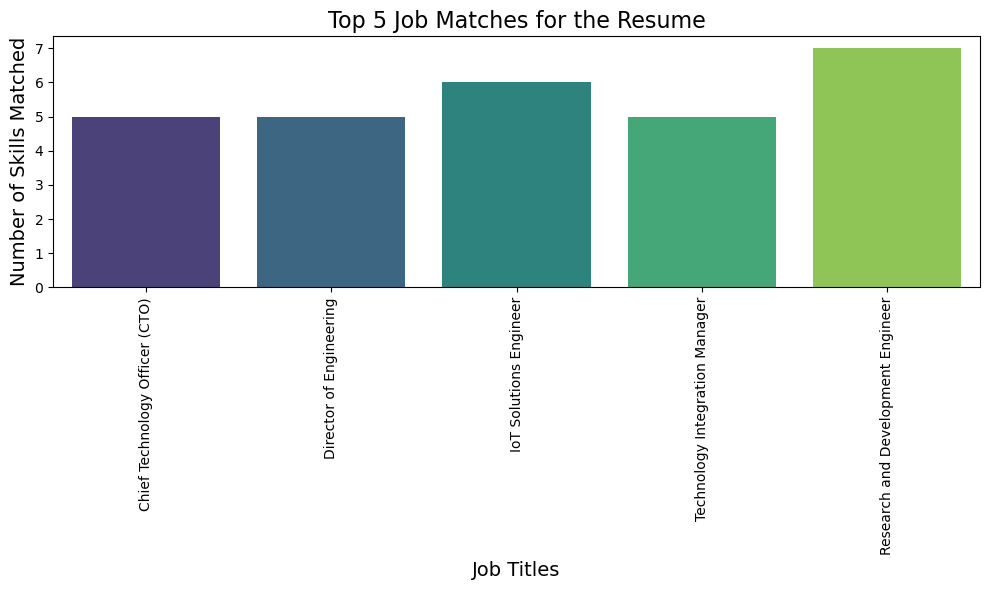

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

job_titles = top_5_jobs['Job Title']
skills_count = [len(skills.split(', ')) for skills in top_5_jobs['Skills']]

plt.figure(figsize=(10, 6))
sns.barplot(x=job_titles, y=skills_count, palette='viridis')
plt.title('Top 5 Job Matches for the Resume', fontsize=16)
plt.xlabel('Job Titles', fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Number of Skills Matched', fontsize=14)
plt.tight_layout()
plt.show()
